In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("/content/SVM.csv")

In [55]:
# Display the records of the dataset
dataset.head()

,Gender,Age,Smoker,BPMed,Stroke,Hypertension,Diabetes,Cholestrol,Systolic,Diastolic,BP,Heartrate,HeartProblem
0,1,1,0,0,0,0,0,0,0,0,0,1,1
1,0,1,0,0,0,0,0,2,2,2,2,1,0
2,1,1,1,0,0,0,0,2,2,2,2,1,1
3,0,2,1,0,0,1,0,1,1,2,2,1,1
4,0,1,1,0,0,0,0,2,2,2,2,1,0


In [56]:
# Shape method will show us the dimension
# of the Dataset
dataset.shape

(4240, 13)

In [57]:
# Data Processing
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 0
Integer variables: 13
Float variables: 0


<Axes: >

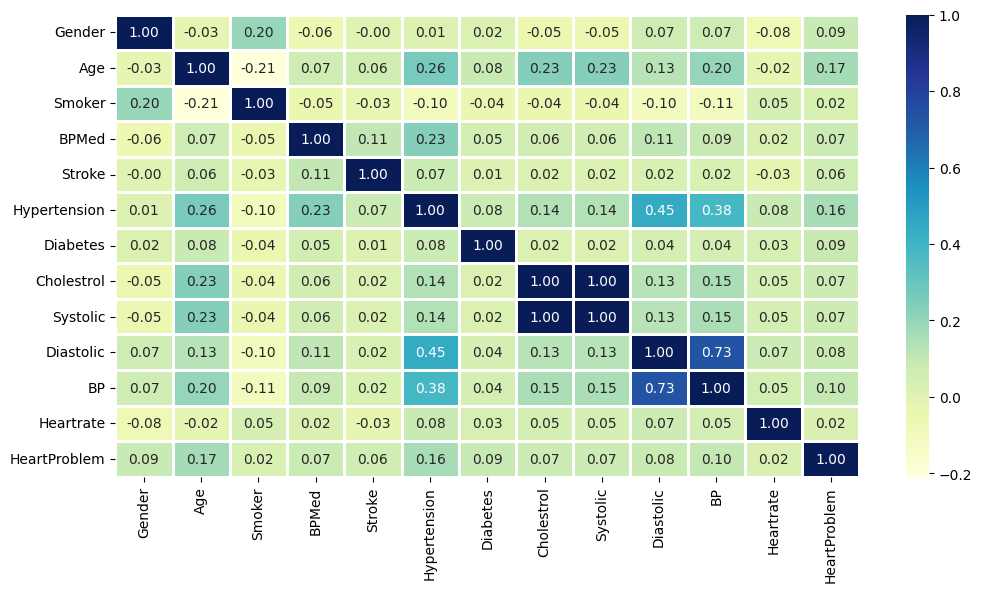

In [58]:
# Exploratory Data Analysis
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
            cmap = 'YlGnBu',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

**Replacing HeartProblem empty values with their mean values to make the data distribution symmetric.**

In [59]:
dataset['HeartProblem'] = dataset['HeartProblem'].fillna(
  dataset['HeartProblem'].mean())

**Drop records with null values (as the empty records are very less).**

In [60]:
new_dataset = dataset.dropna()

✅**OneHotEncoder - For Label Categorical Features :**
*By using OneHotEncoder, we can easily convert object data into int(Integer). So for that, firstly we have to collect all the features which have the object datatype. To do so, we will make a loop.*

In [61]:
from sklearn.preprocessing import OneHotEncoder
 
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:-")
print(object_cols)
print('No. of. Categorical Features: ',
      len(object_cols))

Categorical variables:-
[]
No. of. Categorical Features:  0


In [62]:
# Applying OneHotEncoding to the whole list
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

✅**Splitting Dataset into Training and Testing**

In [63]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
# Separating Target variables
X = df_final.values[:, 1:5]
y = df_final.values[:, 0]

# To divide data into attributes and labels
X = df_final.drop(['HeartProblem'], axis=1)
y = df_final['HeartProblem']

#X = dataset
#y = dataset['HeartProblem']

# Split dataset into training set and testing set
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.30, random_state=100) # 70% training and 30% testing

**SVM - Support Vector Machine** : *SVM can be used for both regression and classification model. It finds the hyperplane in the n-dimensional plane.*

In [64]:
## Generating a Model
from sklearn import svm
clf=svm.SVC(kernel='linear') #SVC = Support Vector Classifier
#clf=svm.SVC(kernel='poly')
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)

In [65]:
from sklearn import metrics
print("Accuracy = ",metrics.accuracy_score(test_y,y_pred))

Accuracy =  0.85062893081761


✅**Plot the support vectors in LinearSVC**

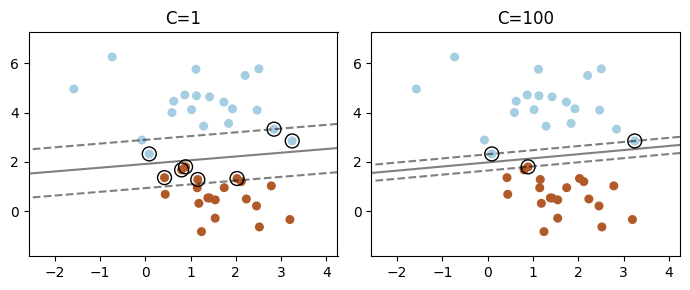

In [66]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay

X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(7, 3))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # Obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # Calculate the decision function manually
    #decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

In [67]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_params = {
    'n_estimators':100,
    'criterion':'entropy',
    'max_features':0.5,
    'min_samples_leaf':10,
    'random_state':11,
    'n_jobs':-1
}
skf = StratifiedKFold(n_splits=10)
scores = []

for train_index, test_index in skf.split(X,y):
  train_X, test_X = X[train_index], X[test_index]
  train_y, test_y = y[train_index], y[test_index]
  rf_skf = RandomForestClassifier(**rf_params);
  rf_skf.fit(train_X,train_y);
  y_pred = rf_skf.predict(test_X)
  scores.append(accuracy_score(test_y,y_pred))
#print(scores)
print(sum(scores)/10.0)

0.975


✅**Bagging**

In [70]:
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

dataset = pd.read_csv("/content/SVM.csv")
array = dataset.values
X = array[:,0:10]
y = array[:,10]

x = 1
seed = 7

kfold = model_selection.KFold(n_splits=10, shuffle=bool(x), random_state=seed)
svm = SVC()

num_trees = 50
model = BaggingClassifier(estimator=svm, n_estimators=num_trees, random_state=seed)
result = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy = ", result.mean())

Accuracy =  0.8773584905660377


In [32]:
#from sklearn.ensemble import BaggingClassifier

#bc_params = {
#    'estimator': clf,
#    'n_estimators': 50,
#    'max_samples': 0.5,
#    'random_state': 11,
#    'n_jobs': -1
#}
#bc = BaggingClassifier(**bc_params)

In [33]:
#bc.fit(train_X, train_y)
#bc_preds_train = bc.predict(train_X)
#bc_preds_test = bc.predict(test_X)

#scores = []

#print('Bagging Classifier :-\n> Accuracy on training data = {:.4f}\n> Accuracy on test data = {:.4f}'.format(
#    accuracy_score(train_y, bc_preds_train),
#    accuracy_score(test_y, bc_preds_test)
#))

✅**Boosting**

In [71]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

x = 1
seed = 7
num_trees = 30

kfold = model_selection.KFold(n_splits=10, shuffle=bool(x),random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
result = model_selection.cross_val_score(model,X,y,cv=kfold)
print("Accuracy = ", result.mean())

Accuracy =  0.8794811320754716
